## Audience Imact on Games in Europe 2019-20

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
# The data files for each league
epl_att_data = "../final-resources/EPL/EPL_scores_attendances.csv"
bun_att_data = "../final-resources/BUN/BUN_scores_attendances.csv"
lig_att_data = "../final-resources/LIG/LIG_scores_attendances.csv"
ser_att_data = "../final-resources/SER/SER_scores_attendances.csv"
images_path = "../images/Audience_impact"

### Setting and Functions for charts

In [3]:
# The following columns will be selected from the dataset
cols = ["Date",
    "HomeTeam",
    "HomeTeam ID", 
    "HomeScore",
    "AwayTeam",
    "AwayTeam ID",
    "AwayScore", 
    "Result",
    "Attendance"]

# Data cleaning (fillna, types) and print summary numbers
def Summary(df, league):
    
    ndf = df.copy()
    s = ndf["Attendance"]
    if s.dtype == 'object':
        ndf["Attendance"] = s.str.replace(',', '').astype(float)
    ndf = ndf.fillna(0)
    
    # Filter all the rows for which there is no attendance and the match date is before Covid
    # -- Attendance data is missing
    Covid_date = "2020-04-01"
    ddf = ndf.loc[ (ndf["Attendance"]==0) & (ndf["Date"]<Covid_date) ]
    ndf.drop(ddf.index, inplace=True)
    
    # The total number of matches of the 'league' in 2019-20
    total = len(ndf['Date'])
    
    # The number of matches after COVID-19
    after = len(ndf.loc[ndf["Date"] > Covid_date])
    if league == "All":
        print(f"The number of matches of {league} teams until {ndf['Date'].at[total -1]} is {total}")
        print(f"The number of matches of {league} teams after COVID-19 is {after}")
    return ndf

In [8]:
# Load league data and clean-up
epl_all_data_df = pd.read_csv(epl_att_data)
bun_all_data_df = pd.read_csv(bun_att_data)
lig_all_data_df = pd.read_csv(lig_att_data)
ser_all_data_df = pd.read_csv(ser_att_data)
epl_df = Summary(epl_all_data_df, "EPL")
bun_df = Summary(bun_all_data_df, "BUN")
lig_df = Summary(lig_all_data_df, "LIG")
ser_df = Summary(ser_all_data_df, "SER")

# Combine four datasets to create the dataset for all matches
all_df = epl_df.append(bun_df, ignore_index=True)
all_df = all_df.append(lig_df, ignore_index=True)
all_df = all_df.append(ser_df, ignore_index=True)
all_df = Summary(all_df, "All")
all_df.describe()

The number of matches of All teams until 2020-07-13 is 1116
The number of matches of All teams after COVID-19 is 298


,HomeScore,AwayScore,Attendance
count,1116.000000,1116.000000,1116.000000
mean,1.553763,1.272401,26124.422939
std,1.285230,1.210266,22595.363563
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,1.000000,1.000000,23223.500000
75%,2.000000,2.000000,41234.250000
max,8.000000,9.000000,93426.000000


In [5]:
# Save the all_attendance data to csv
#all_df.to_csv("../final-resources/All_Attendance_Data.csv", index=False)

In [24]:
bins = [x for x in range(1,100000,10000)]
bins_label = ["No audience"]+[f"[{num},{num+9999})" for num in bins]
bins.insert(0,0)
bins_label.pop()
all_df["Attendance Range"] = pd.cut(all_df["Attendance"], bins, labels=bins_label, right=False)

In [25]:
all_df.head()

,Div,Date,Time,HomeTeam,AwayTeam,HomeScore,AwayScore,Result,HomeTeam ID,AwayTeam ID,City,Team ID,Opponent,Attendance,City,Attendance Range
0,E0,2019-08-09,20:00,Liverpool,Norwich,4,1,H,EPL9,EPL13,Liverpool,EPL9,Norwich City,53333.0,0,"[50001,60000)"
1,E0,2019-08-10,12:30,West Ham,Man City,0,5,A,EPL18,EPL10,London,EPL18,Manchester City,59870.0,0,"[50001,60000)"
2,E0,2019-08-10,15:00,Watford,Brighton,0,3,A,EPL17,EPL3,Watford,EPL17,Brighton & Hove Albion,20245.0,0,"[20001,30000)"
3,E0,2019-08-10,17:30,Tottenham,Aston Villa,3,1,H,EPL16,EPL1,London,EPL16,Aston Villa,60407.0,0,"[60001,70000)"
4,E0,2019-08-10,15:00,Crystal Palace,Everton,0,0,D,EPL6,EPL7,London,EPL6,Everton,25151.0,0,"[20001,30000)"


In [26]:
wins_in_range = all_df.groupby("Attendance Range")

In [27]:
h_wins = []
a_wins = []
for key in bins_label:
    one_gp = wins_in_range.get_group(key)
    s = one_gp.loc[one_gp["Result"] == "H"].shape
    h_wins.append(s[0])
    s = one_gp.loc[one_gp["Result"] == "A"].shape
    a_wins.append(s[0])

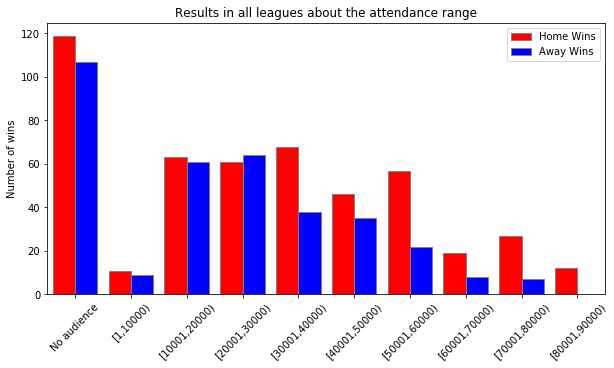

In [38]:
n = len(h_wins)
x = np.arange(n)
c = {"H" : 'r', "A" : 'b'}
w = 0.4
fig,ax = plt.subplots(figsize=(10,5))
ax.set_title("Results in all leagues about the attendance range")
ax.bar(x-w/2, h_wins, color=c["H"], edgecolor = 'gray', width=w, label = "Home Wins")
ax.bar(x+w/2, a_wins, color=c["A"], edgecolor = 'gray', width=w, label = "Away Wins")
ax.set_xlim(-0.5, n-0.5)
ax.set_xticks(x)
ax.set_xticklabels(bins_label, rotation=45)
ax.set_ylabel("Number of wins")
ax.legend()
plt.show()